# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

데이터 불러오기

In [2]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submiss_sam = pd.read_csv('sample_submission.csv')

In [3]:
test

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66,0,0,37.8,0.261,41
1,TEST_001,3,107,62,13,48,22.9,0.678,23
2,TEST_002,3,113,44,13,0,22.4,0.140,22
3,TEST_003,6,190,92,0,0,35.5,0.278,66
4,TEST_004,1,107,72,30,82,30.8,0.821,24
...,...,...,...,...,...,...,...,...,...
111,TEST_111,10,111,70,27,0,27.5,0.141,40
112,TEST_112,1,119,54,13,50,22.3,0.205,24
113,TEST_113,3,187,70,22,200,36.4,0.408,36
114,TEST_114,3,100,68,23,81,31.6,0.949,28


In [4]:
# .head()로 데이터 간단히 살펴보기

In [5]:
display(train.head(),test.head(),submiss_sam.head())

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66,0,0,37.8,0.261,41
1,TEST_001,3,107,62,13,48,22.9,0.678,23
2,TEST_002,3,113,44,13,0,22.4,0.140,22
3,TEST_003,6,190,92,0,0,35.5,0.278,66
4,TEST_004,1,107,72,30,82,30.8,0.821,24


,ID,Outcome
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


In [6]:
# len(), info()로 데이터 수, 결측치 확인

In [7]:
len(train) , len(test) , len(submiss_sam)

(652, 116, 116)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


In [ ]:
target_counts = train['Outcome'].value_counts()
target_ratio = train['Outcome'].value_counts(normalize=True)
# 2대1이다.

(array([424.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 228.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

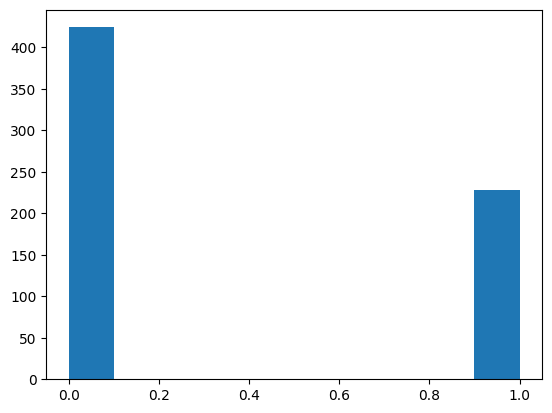

In [9]:
plt.hist(train.Outcome)

(array([409., 138.,  55.,  26.,   7.,   9.,   4.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

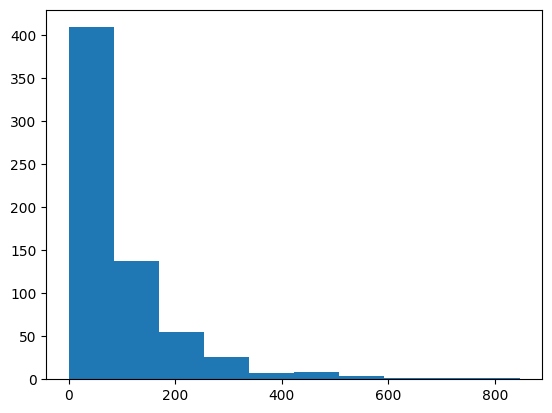

In [10]:
plt.hist(train.Insulin)

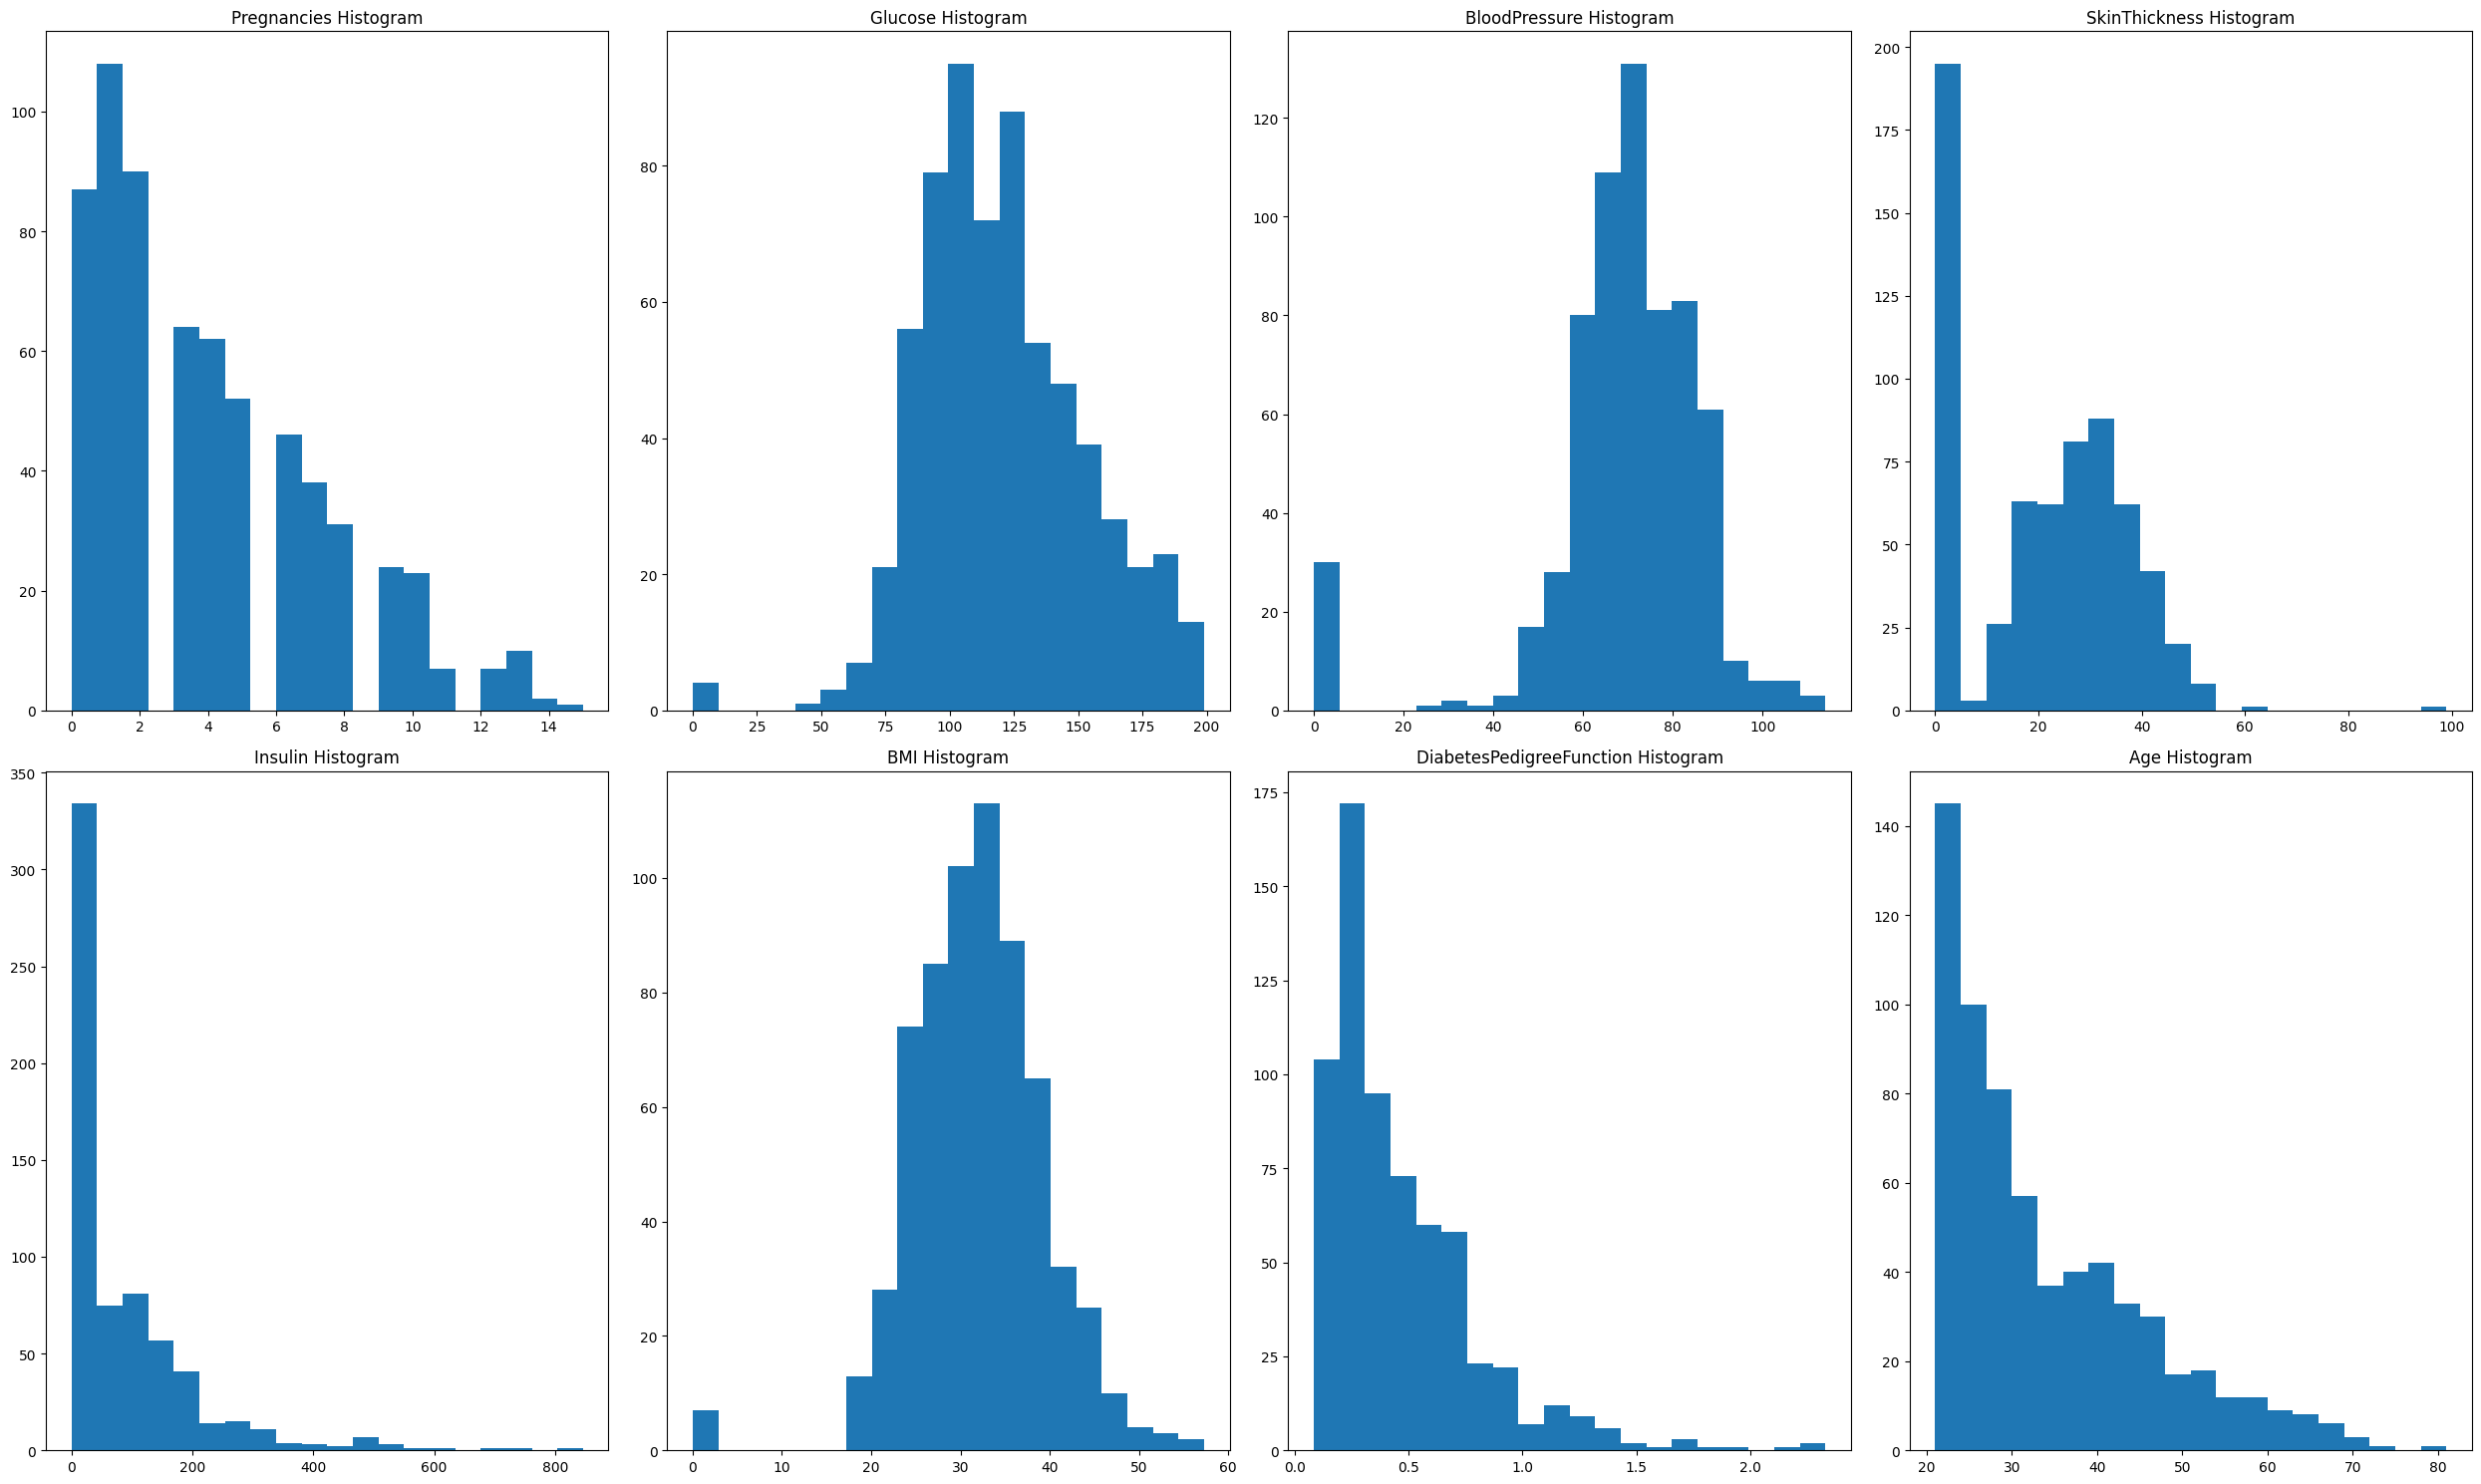

In [11]:

# feature 선택
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 15))

# 각 feature에 대한 histogram 그리기
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    axes[row, col].hist(train[feature], bins=20)  # 20개의 bin 사용
    axes[row, col].set_title(feature + ' Histogram')

plt.tight_layout()
plt.show()

(array([409., 138.,  55.,  26.,   7.,   9.,   4.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

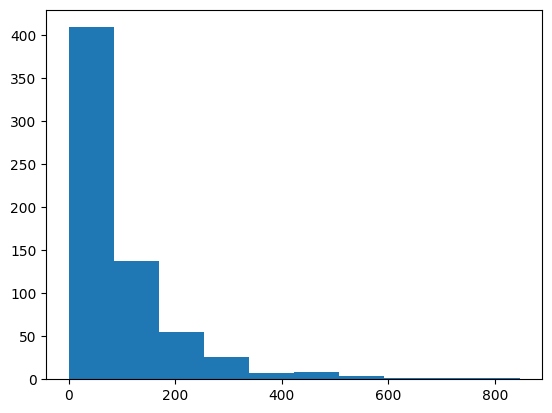

In [12]:
plt.hist(train.Insulin)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  seaborn 을 이용한 시각화
target_ratio = round(train['Outcome'].value_counts(normalize=True) * 100, 2)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Outcome', data=train)

# gpt이용
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2.,
            height,
            '{:.2f}%'.format(target_ratio[i]),
            ha="center")

plt.show()

In [13]:
def replace_zeros_with_mean(df):
    updated_df = df.copy()  # 데이터프레임의 복사본 생성
    for column in updated_df.columns[3:-1]:  # 첫 번째 열(ID), 임신횟수와 마지막 열(Outcome)을 제외한 모든 열에 대해 반복
        mean_value = updated_df[column][updated_df[column] != 0].mean()  # 0이 아닌 값들의 평균 계산
        updated_df[column] = updated_df[column].replace(0, mean_value)  # 0 값을 평균값으로 대체
    return updated_df


In [14]:
# 0 값을 평균값으로 대체하는 함수 적용
updated_train = replace_zeros_with_mean(train)

updated_test = replace_zeros_with_mean(test)
display(updated_train,updated_test)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60.0,33.000000,192.000000,24.0,0.966,33,0
1,TRAIN_001,10,133,68.0,29.161926,157.883234,27.0,0.245,36,0
2,TRAIN_002,4,112,78.0,40.000000,157.883234,39.4,0.236,38,0
3,TRAIN_003,1,119,88.0,41.000000,170.000000,45.3,0.507,26,0
4,TRAIN_004,1,114,66.0,36.000000,200.000000,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64.0,24.000000,157.883234,29.2,0.192,21,0
648,TRAIN_648,10,122,68.0,29.161926,157.883234,31.2,0.258,41,0
649,TRAIN_649,8,84,74.0,31.000000,157.883234,38.3,0.457,39,0
650,TRAIN_650,2,81,72.0,15.000000,76.000000,30.1,0.547,25,0


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66.00000,29.107143,142.55,37.800000,0.261,41
1,TEST_001,3,107,62.00000,13.000000,48.00,22.900000,0.678,23
2,TEST_002,3,113,44.00000,13.000000,142.55,22.400000,0.140,22
3,TEST_003,6,190,92.00000,29.107143,142.55,35.500000,0.278,66
4,TEST_004,1,107,72.00000,30.000000,82.00,30.800000,0.821,24
...,...,...,...,...,...,...,...,...,...
111,TEST_111,10,111,70.00000,27.000000,142.55,27.500000,0.141,40
112,TEST_112,1,119,54.00000,13.000000,50.00,22.300000,0.205,24
113,TEST_113,3,187,70.00000,22.000000,200.00,36.400000,0.408,36
114,TEST_114,3,100,68.00000,23.000000,81.00,31.600000,0.949,28


(array([409., 138.,  55.,  26.,   7.,   9.,   4.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

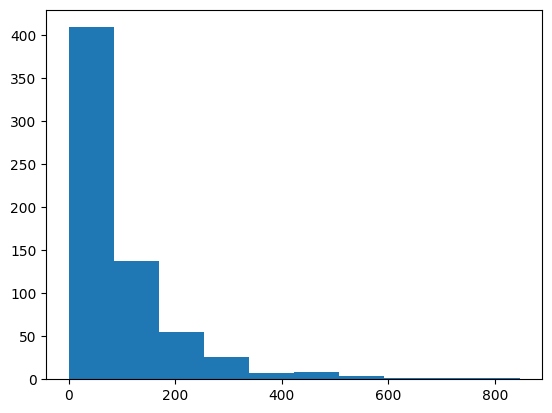

In [15]:
plt.hist(train.Insulin)

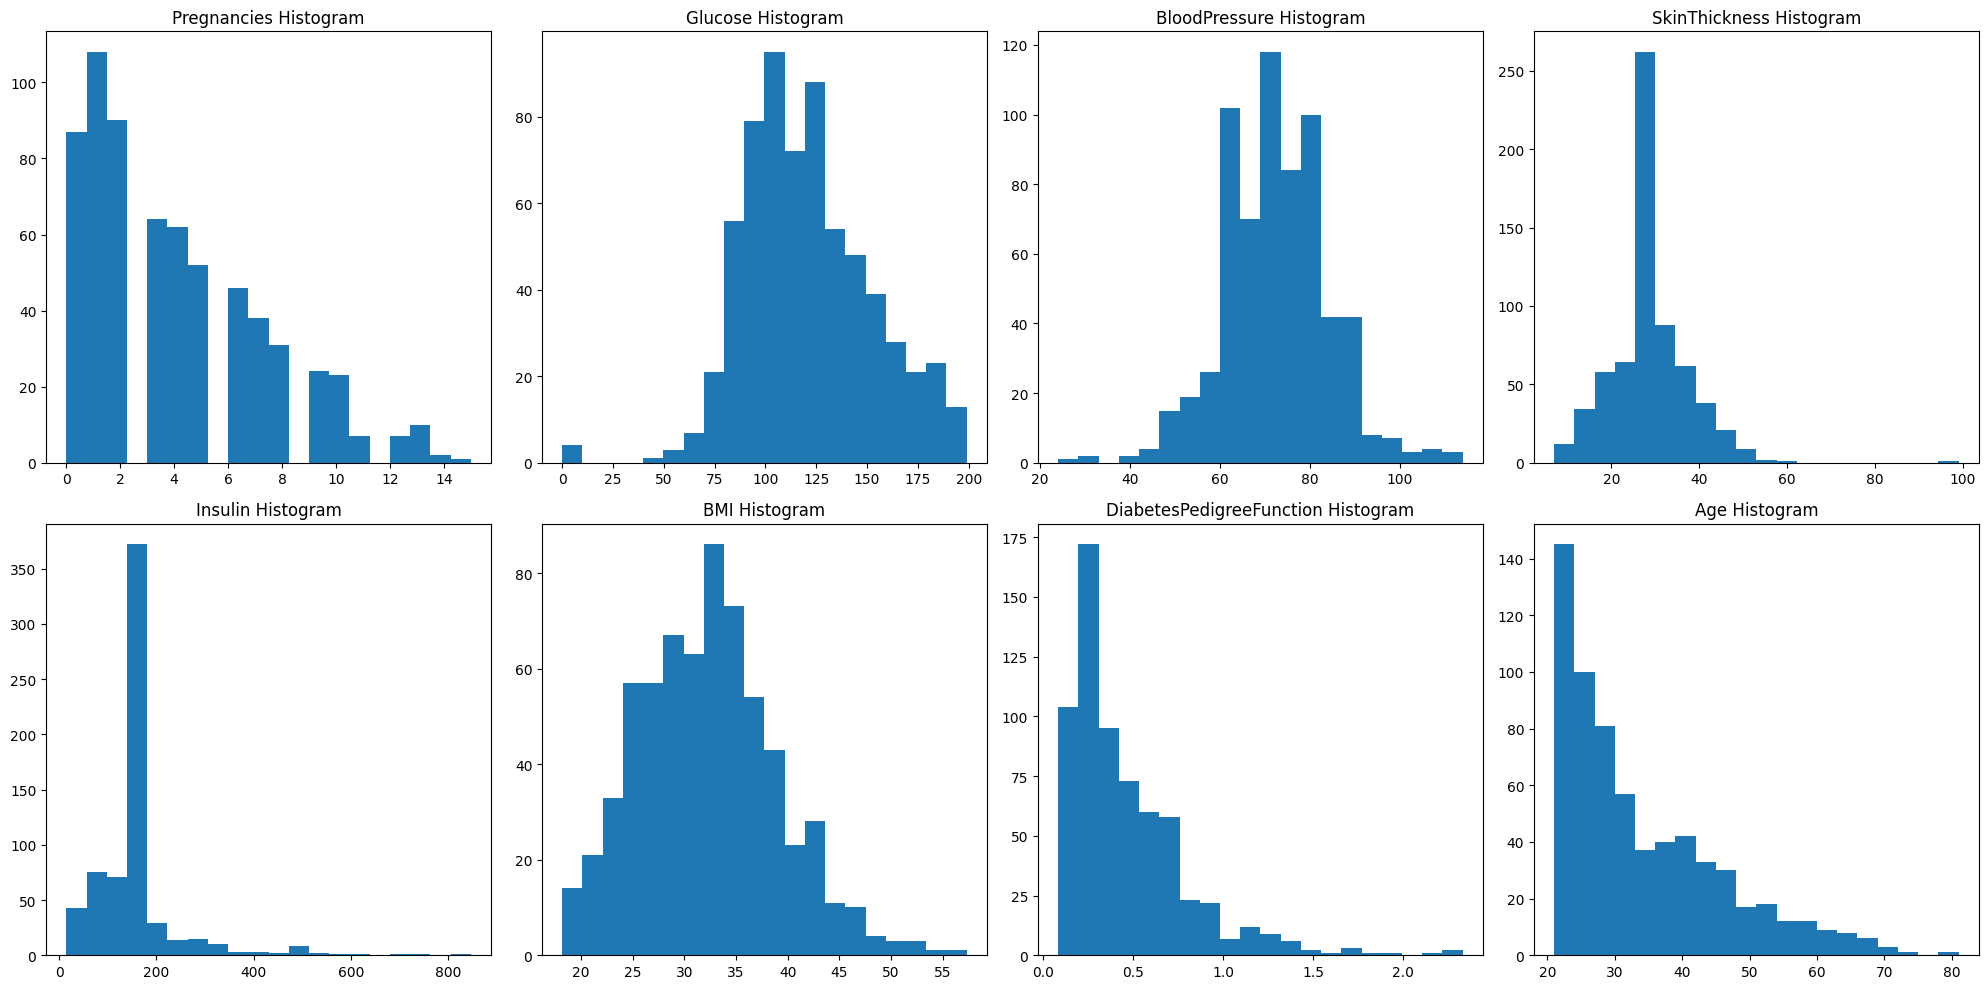

In [16]:

# feature 선택
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# 각 feature에 대한 histogram 그리기
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    axes[row, col].hist(updated_train[feature], bins=20)  # 20개의 bin 사용
    axes[row, col].set_title(feature + ' Histogram')

plt.tight_layout()
plt.show()

((array([409., 138.,  55.,  26.,   7.,   9.,   4.,   1.,   2.,   1.]),
  array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
         761.4, 846. ]),
  <BarContainer object of 10 artists>),
 (array([118., 443.,  43.,  25.,   6.,  10.,   3.,   1.,   2.,   1.]),
  array([ 15. ,  98.1, 181.2, 264.3, 347.4, 430.5, 513.6, 596.7, 679.8,
         762.9, 846. ]),
  <BarContainer object of 10 artists>))

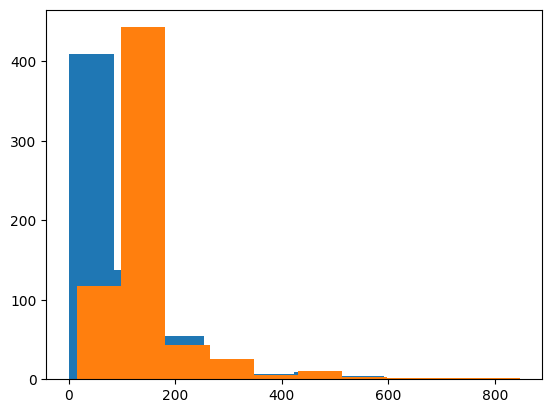

In [17]:
plt.hist(train.Insulin),plt.hist(updated_train.Insulin)

시각화

In [18]:
updated_train = updated_train.drop(['ID'],axis=1)
updated_test = updated_test.drop(['ID'],axis=1)


In [19]:
korean_features = {
    'Pregnancies': '임신 횟수',
    'Glucose': '혈당',
    'BloodPressure': '혈압',
    'SkinThickness': '피부 두께',
    'Insulin': '인슐린',
    'BMI': '체질량 지수',
    'DiabetesPedigreeFunction': '당뇨병 혈통 기능',
    'Age': '나이'
}
#updated_train = updated_train.rename(columns=korean_features) #한글폰트깨짐이슈로 제거
korean_feature_values = list(korean_features.values())

In [20]:
updated_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,103,60.0,33.000000,192.000000,24.0,0.966,33,0
1,10,133,68.0,29.161926,157.883234,27.0,0.245,36,0
2,4,112,78.0,40.000000,157.883234,39.4,0.236,38,0
3,1,119,88.0,41.000000,170.000000,45.3,0.507,26,0
4,1,114,66.0,36.000000,200.000000,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...
647,1,91,64.0,24.000000,157.883234,29.2,0.192,21,0
648,10,122,68.0,29.161926,157.883234,31.2,0.258,41,0
649,8,84,74.0,31.000000,157.883234,38.3,0.457,39,0
650,2,81,72.0,15.000000,76.000000,30.1,0.547,25,0


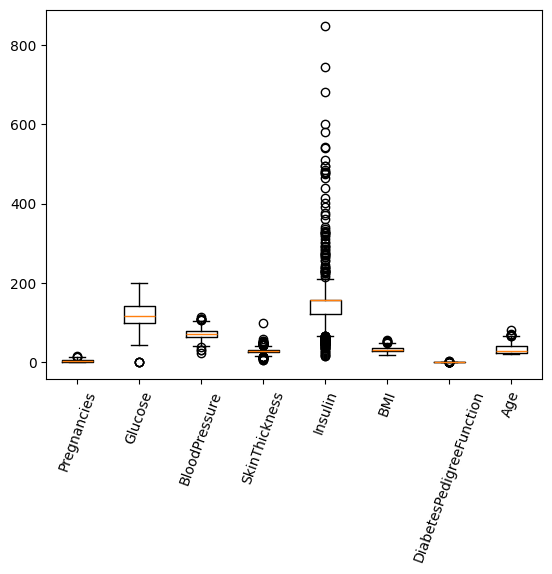

In [21]:
import matplotlib.pyplot as plt

def boxplot_with_angled_labels(dataframe, features):
    # 상자 수염 그림 그리기
    boxplot = plt.boxplot(dataframe[features])
    
    # 각 feature 레이블을 30도 기울여서 설정
    plt.xticks(ticks=range(1, len(features) + 1), labels=features, rotation=70)
    
    # 그래프 출력
    plt.show()

# 사용 예시

boxplot_with_angled_labels(updated_train, features)

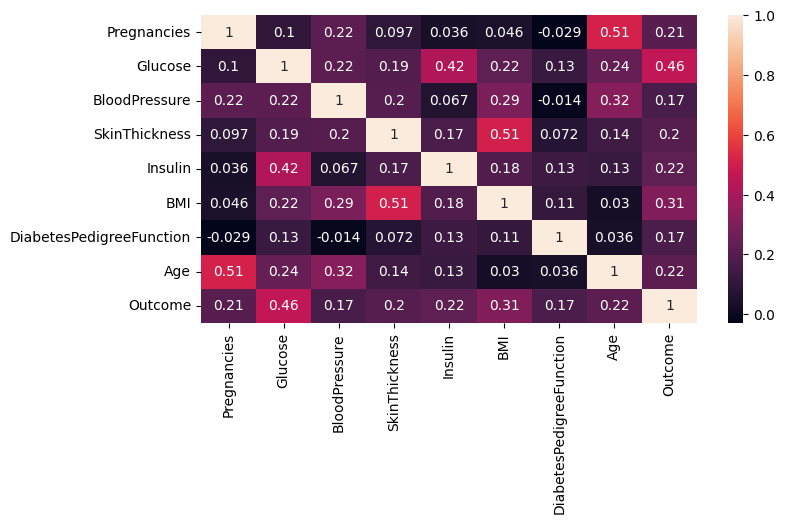

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이번 셀에서 출력할 이미지 크기를 지정합니다. 
plt.figure(figsize = (8,4))

# annot을 False로 설정하면 각 셀의 수치가 표기되지 않습니다.
sns.heatmap(updated_train.corr(), annot = True)
plt.show()

(array([  4.,   0.,   4.,  28., 135., 167., 142.,  87.,  49.,  36.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

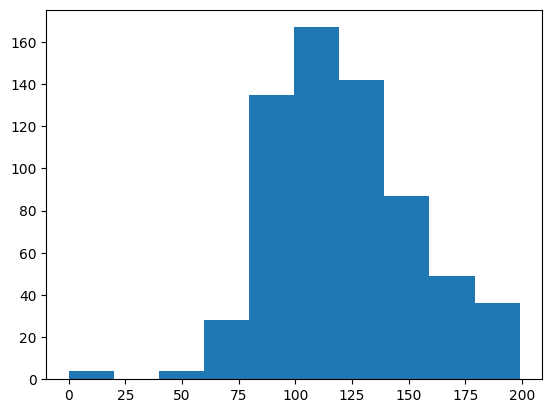

In [23]:
plt.hist(train.Glucose)

전처리

In [24]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# user_train 데이터프레임의 'Glucose' 열에 대해 스케일링 적용

scaler.fit(updated_train[['Glucose']])
updated_train['Glucose_scaled'] = scaler.transform(updated_train[['Glucose']])
updated_train = updated_train.drop(['Glucose'],axis=1)
updated_test['Glucose_scaled'] = scaler.transform(updated_test[['Glucose']])
updated_test = updated_test.drop(['Glucose'],axis=1)

In [25]:
# 데이터 인코딩(레이블 or 원핫 인코딩) 필요X

In [26]:
# 독립변수(X), 종속변수(y)로 나누기
# 데이터 세트 분리

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# train 데이터에서 'Outcome' 열을 Target으로 지정
X = updated_train.drop(columns=['Outcome'])  # Outcome을 제외한 모든 열을 특성으로 사용
y = updated_train['Outcome']  # Outcome 열을 Target으로 사용

# Min-Max 스케일링을 통해 데이터 스케일 조정
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ridge Regression 모델 학습
ridge_model = Ridge(alpha=1.0)  # alpha 값은 regularization 강도를 조절하는 하이퍼파라미터
ridge_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = ridge_model.predict(X_test)
y_pred1 = np.where(y_pred>0.5,1,0)

# 모델 성능 평가 (예시로 평균 제곱 오차 사용)
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)
np.round(y_pred,2)

Mean Squared Error: 0.2193877551020408


array([ 0.04,  0.19,  0.63,  0.54,  0.16,  0.23,  0.03,  0.27,  0.65,
        0.71, -0.  ,  0.39,  0.52,  0.08, -0.13,  0.47,  0.35, -0.  ,
        0.07,  0.5 ,  0.11,  0.05,  0.09,  0.4 ,  0.47,  0.46,  0.15,
        0.23,  0.81,  0.25,  0.65,  0.65,  0.22,  0.26,  0.33,  0.27,
       -0.17,  0.4 ,  0.24, -0.01,  0.37, -0.09,  0.6 ,  0.04,  0.51,
        0.39,  0.5 ,  0.35,  0.27,  0.13,  0.03,  0.31,  0.63,  0.71,
        0.43,  0.15,  0.32,  0.29,  0.66,  0.09,  0.62,  0.37,  0.63,
        0.22,  0.82,  0.65,  0.57,  0.25,  0.99,  0.73,  0.02,  0.43,
        0.41,  0.34,  0.11,  0.42,  0.96,  0.25, -0.  ,  0.35,  0.76,
        0.28,  0.37,  0.41,  0.38,  0.18,  0.14,  0.61,  0.41,  0.49,
        0.38,  0.07,  0.32,  0.22,  0.64,  0.77,  0.44,  0.4 ,  0.29,
        0.49,  0.44,  0.79,  0.28,  0.17,  0.01,  0.33,  0.27,  0.13,
        0.53,  0.26,  0.46,  0.28,  0.38,  0.37, -0.  ,  0.29,  0.66,
        0.36,  0.22,  0.38,  0.83,  0.35,  0.27,  0.06,  0.5 ,  0.21,
       -0.1 ,  0.02,

In [27]:
X_train

array([[0.13333333, 0.73333333, 0.2408905 , ..., 0.32115813, 0.75      ,
        0.79396985],
       [0.13333333, 0.51111111, 0.41304348, ..., 0.03296214, 0.53333333,
        0.98994975],
       [0.06666667, 0.55555556, 0.10869565, ..., 0.16169265, 0.2       ,
        0.83919598],
       ...,
       [0.        , 0.62222222, 0.41304348, ..., 0.10957684, 0.08333333,
        0.47738693],
       [0.6       , 0.51111111, 0.2408905 , ..., 0.25300668, 0.4       ,
        0.65326633],
       [0.06666667, 0.53576277, 0.2408905 , ..., 0.08819599, 0.33333333,
        0.90452261]])

In [28]:
display(updated_train,updated_test)

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_scaled
0,4,60.0,33.000000,192.000000,24.0,0.966,33,0,0.517588
1,10,68.0,29.161926,157.883234,27.0,0.245,36,0,0.668342
2,4,78.0,40.000000,157.883234,39.4,0.236,38,0,0.562814
3,1,88.0,41.000000,170.000000,45.3,0.507,26,0,0.597990
4,1,66.0,36.000000,200.000000,38.1,0.289,21,0,0.572864
...,...,...,...,...,...,...,...,...,...
647,1,64.0,24.000000,157.883234,29.2,0.192,21,0,0.457286
648,10,68.0,29.161926,157.883234,31.2,0.258,41,0,0.613065
649,8,74.0,31.000000,157.883234,38.3,0.457,39,0,0.422111
650,2,72.0,15.000000,76.000000,30.1,0.547,25,0,0.407035


,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_scaled
0,5,66.00000,29.107143,142.55,37.800000,0.261,41,0.562814
1,3,62.00000,13.000000,48.00,22.900000,0.678,23,0.537688
2,3,44.00000,13.000000,142.55,22.400000,0.140,22,0.567839
3,6,92.00000,29.107143,142.55,35.500000,0.278,66,0.954774
4,1,72.00000,30.000000,82.00,30.800000,0.821,24,0.537688
...,...,...,...,...,...,...,...,...
111,10,70.00000,27.000000,142.55,27.500000,0.141,40,0.557789
112,1,54.00000,13.000000,50.00,22.300000,0.205,24,0.597990
113,3,70.00000,22.000000,200.00,36.400000,0.408,36,0.939698
114,3,68.00000,23.000000,81.00,31.600000,0.949,28,0.502513


In [29]:
test_scaled = scaler.fit_transform(updated_test)

test_pred = ridge_model.predict(test_scaled)
test_pred
test_pred = np.where(test_pred > 0.5, 1, 0)
print(test_pred)
np.round(test_pred,2)

[0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0]


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0])

In [30]:
submiss_sam.Outcome = test_pred
submiss_sam

,ID,Outcome
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,1
4,TEST_004,0
...,...,...
111,TEST_111,0
112,TEST_112,0
113,TEST_113,1
114,TEST_114,0


(array([87.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

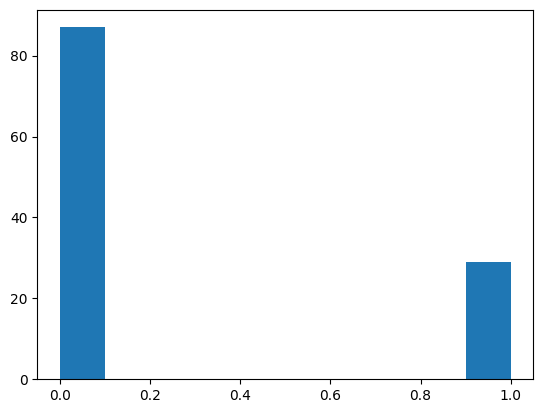

In [31]:
plt.hist(submiss_sam.Outcome)

In [32]:
submiss_sam.to_csv('submissionRidge.csv',index=False)

모델 정의, 학습 및 평가

In [ ]:
# 로지스틱 회귀 정의 및 학습

In [ ]:
# 로지스틱 회귀 평가

In [ ]:
# 랜덤 포레스트 정의 및 학습

In [ ]:
# 랜덤 포레스트 평가

In [ ]:
# GBM, XGBoost, LightGBM 정의 및 학습

In [ ]:
# GBM, XGBoost, LightGBM 평가

성능개선 : 하이퍼 파라미터 튜닝

In [ ]:
# 로지스틱 회귀 하이퍼 파라미터 튜닝

In [ ]:
# 랜덤 포레스트 하이퍼 파라미터 튜닝

In [ ]:
# GBM, XGBoost, LightGBM 하이퍼 파라미터 튜닝

성능개선 : 앙상블

In [ ]:
# 보팅 (soft & hard)

예측

In [ ]:
# 학습을 완료한 모델로 예측값 도출

제출

In [ ]:
# 제출할 파일 생성 및 저장

(번외)

In [ ]:
# 모델 예측의 정확도, 정밀도, 재현율, F1-score를 모두 계산해서 print() 해보세요.
# 모델의 성능을 종합적으로 판단하기에 좋은 기준이 되어줍니다.

In [ ]:
# 동일한 조건에서 레이블 인코딩을 수행한 데이터와 원핫 인코딩을 수행한 
# 데이터의 예측결과를 비교해보세요.

In [ ]:
# 수단과 방법을 가리지 말고 모델의 성능을 증가시켜보세요.